In [ ]:
# Drive Access, import libraries
import nltk
import pandas as pd
import re
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from google.colab import drive


drive.mount('/content/drive')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

Mounted at /content/drive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# Read dataset
pd.set_option('display.max_colwidth', None)
spotify_df = pd.read_csv("/content/drive/MyDrive/data/reviews.csv")

spotify_df = spotify_df[spotify_df.Rating != 3]
spotify_df.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality and the app is easy to use. Also very quick and friendly support.",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This app is super great. I give it five stars+,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience on Android 12"" is too annoying. Please let's get rid of this.",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't put on my playlist??? And why do we have shuffle play?,1,1,NaN


In [ ]:
# Initialize lemmatization functions
# Reference the sentence lemmatization techinque from this link: https://gist.github.com/gaurav5430/9fce93759eb2f6b1697883c3782f30de

lemmatizer = WordNetLemmatizer()

# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

In [ ]:
# Perform Lemmatization on raw text
spotify_df['processed_text'] = spotify_df['Review'].map(lemmatize_sentence)

In [ ]:
# Perform text preprocessing on lemmatized documents
def preprocessing(line):
  # Remove stopwords
  newline = re.sub(r'also|well|much|get|take|make|try|must|the|things?|sometimes?|\bthou?g?h?\b|absolutel?y?|actuall?y?|every|times?|wants?|really', "", line, flags=re.IGNORECASE)
  newline = re.sub(r'\bable\b|always|\beven\b|would|every|needs?|could|wish|since|can|can\'?t|\bca\b|\bgo\b|please|wants?', "", newline, flags=re.IGNORECASE)
  newline = re.sub(r'[0-9]+', "", newline, flags=re.IGNORECASE)
  # Group all reference to songs
  newline = re.sub(r'songs?|music|melody|vocal', "_song_", newline, flags=re.IGNORECASE)
  # Group all reference to ads
  newline = re.sub(r'advertisements?|\bads?\b|commercials?', "_ad_", newline, flags=re.IGNORECASE)
  # Group all reference to the Spotify app
  newline = re.sub(r'spotify|\bapps?\b|software', "_spotify_", newline, flags=re.IGNORECASE)
  return newline


spotify_df['cleaned_review'] = spotify_df.processed_text.apply(preprocessing)

In [ ]:
# Apply tfidf vectorizer to preprocessed documents
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=0.01, max_df=0.4, stop_words="english")
X, terms = vectorizer.fit_transform(spotify_df.cleaned_review), vectorizer.get_feature_names_out()
spotify_tf_idf = pd.DataFrame(X.toarray(), columns=terms)
print(f"TF-IDF: {spotify_tf_idf.shape}")

# print tokens
for i in spotify_tf_idf.columns:
  print(i)

TF-IDF: (54708, 238)
_ad_
_ad_ _song_
_song_ _ad_
_song_ _song_
_song_ _spotify_
_song_ add
_song_ just
_song_ like
_song_ listen
_song_ love
_song_ play
_song_ playlist
_song_ podcasts
_song_ stop
_spotify_ _song_
_spotify_ _spotify_
_spotify_ best
_spotify_ good
_spotify_ great
_spotify_ just
_spotify_ listen
_spotify_ play
_spotify_ premium
_spotify_ use
_spotify_ work
_spotify_ year
access
account
add
add _song_
album
allow
amazing
android
annoy
annoying
anor
anymore
artist
audio
available
awesome
bad
bar
best
best _song_
best _spotify_
bluetooth
break
bug
buggy
button
buy
car
cel
change
choice
choose
click
close
close _spotify_
come
completely
connect
connection
constantly
control
crash
create
data
day
delete
device
different
disappear
dont
download
download _song_
downloaded
easy
easy use
enjoy
especially
excellent
experience
far
favorite
favorite _song_
favourite
feature
feel
fine
fix
force
free
genre
good
good _song_
good _spotify_
great
great _song_
great _spotify_
guy
happen


In [ ]:
# Create variables for ml model

# tfidf
tfidf_vectors = spotify_tf_idf.apply(lambda s: s.to_numpy(), axis=1)
X_tfidf = np.array([vector for vector in tfidf_vectors])

# Create binary y variables out of ratings. Rating 4 and 5: 1(representing positive sentiment), Rating 1 and 2: 0(representing negative sentiment)
spotify_df['sentiment'] = [1  if i == 4 or i == 5 else 0 for i in spotify_df['Rating']]
y = spotify_df['sentiment']

print(f"X_tfidf: {X_tfidf.shape}")
print(f"y: {y.shape}")

# Train test split
from sklearn.model_selection import train_test_split
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y, random_state = 0)

print(f"Train: {X_train_tfidf.shape, y_train_tfidf.shape}")
print(f"Test: {X_test_tfidf.shape, y_test_tfidf.shape}")

X_tfidf: (54708, 238)
y: (54708,)
Train: ((41031, 238), (41031,))
Test: ((13677, 238), (13677,))


f1 score: 0.853
Model Accuracy: 0.854
roc auc: 0.924


(0.0, 1.0)

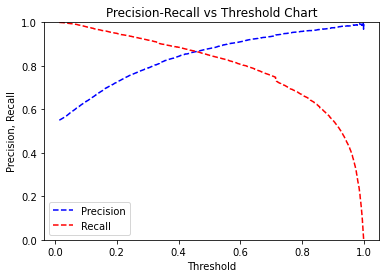

In [ ]:
# Train model, calculate F-1, model accuracy, roc auc, recall, and precision
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

lr = LogisticRegression(max_iter=2000)
lr.fit(X_train_tfidf, y_train_tfidf)
pred = lr.predict(X_test_tfidf)
print(f"f1 score: {round(f1_score(y_test_tfidf, pred, average='macro'),3)}")
print(f'Model Accuracy: {round(np.mean(pred == y_test_tfidf),3)}')
rocauc_score = roc_auc_score(y_true=y_test_tfidf, y_score=lr.predict_proba(X_test_tfidf)[:,1])
print(f"roc auc: {round(rocauc_score,3)}")

probs_y = lr.predict_proba(X_test_tfidf) 
precision, recall, thresholds = precision_recall_curve(y_test_tfidf, probs_y[:,1]) 

import sklearn.metrics as metrics
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

In [ ]:
# Predict sentiment using the model we just trained
overall_pred = lr.predict(X_tfidf)
spotify_df['predicted_sentiment'] = overall_pred

In [ ]:
# Use predict_proba and get the second column, which is the probability of getting a review being positive
positive_prob = lr.predict_proba(X_tfidf)[:,1]

# According to the chart above, the optimal threshold is between 0.4 and 0.5.
# Since we are only interested in the negative reviews, we want to make sure that a classified negative review is really a negative review
# therefore we can use threshold = 0.4 to reduce false negatives
spotify_df['is_negative_review'] = [1 if i <= 0.4 else 0 for i in positive_prob]

# Create a new data frame containing only negative reviews
negative_reviews_df = spotify_df[spotify_df['is_negative_review']==1].copy()
len(negative_reviews_df)

23220

In [ ]:
# Apply tfidf vectorizer again on the negatvie review data frame
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=0.01, max_df=0.4, stop_words="english")
X_neg, terms_neg = vectorizer.fit_transform(negative_reviews_df.cleaned_review), vectorizer.get_feature_names_out()
spotify_tf_idf_neg = pd.DataFrame(X_neg.toarray(), columns=terms_neg)
print(f"TF-IDF: {spotify_tf_idf_neg.shape}")

for i in spotify_tf_idf_neg.columns:
  print(i)

TF-IDF: (23220, 325)
_ad_
_ad_ _song_
_song_ _ad_
_song_ _song_
_song_ _spotify_
_song_ add
_song_ just
_song_ like
_song_ listen
_song_ play
_song_ playlist
_song_ skip
_song_ stop
_spotify_ _song_
_spotify_ _spotify_
_spotify_ bad
_spotify_ crash
_spotify_ fix
_spotify_ good
_spotify_ just
_spotify_ play
_spotify_ premium
_spotify_ stop
_spotify_ use
_spotify_ work
_spotify_ year
access
account
add
add _song_
ago
album
allow
android
annoy
annoying
anor
anymore
appear
artist
asap
ask
audio
auto
automatically
available
background
bad
bad _spotify_
bar
bluetooth
break
bug
buggy
button
buy
buy premium
cache
car
cause
cel
cel subscription
change
choose
choose _song_
clear
click
close
close _spotify_
come
completely
connect
connection
constantly
continue
control
couple
crash
currently
customer
cut
data
day
delete
device
different
different _song_
disappear
display
does
dont
download
download _song_
downloaded
downloaded _song_
edit
eir
email
end
episode
error
experience
feature
fine
fix
fi

In [ ]:
# Topic modeling using NMF on negative reviews
from sklearn.decomposition import NMF

nmf = NMF(n_components=7)
W = nmf.fit_transform(X_neg)
H = nmf.components_
print(f"Original shape of X sports is {X_neg.shape}")
print(f"Decomposed W sports matrix is {W.shape}")
print(f"Decomposed H sports matrix is {H.shape}")

from typing import List
import numpy as np

def get_top_tf_idf_tokens_for_topic(H: np.array, feature_names: List[str], num_top_tokens: int = 5):
  """
  Uses the H matrix (K components x M original features) to identify for each
  topic the most frequent tokens.
  """
  for topic, vector in enumerate(H):
    print(f"TOPIC {topic}\n")
    total = vector.sum()
    top_scores = vector.argsort()[::-1][:num_top_tokens]
    token_names = list(map(lambda idx: feature_names[idx], top_scores))
    strengths = list(map(lambda idx: vector[idx] / total, top_scores))
    
    for strength, token_name in zip(strengths, token_names):
      print(f"\b{token_name} ({round(strength * 100, 1)}%)\n")
    print(f"=" * 50)

get_top_tf_idf_tokens_for_topic(H, spotify_tf_idf_neg.columns.tolist(), 5)

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Original shape of X sports is (23220, 325)
Decomposed W sports matrix is (23220, 7)
Decomposed H sports matrix is (7, 325)
TOPIC 0

play (19.5%)

play _song_ (11.3%)

_song_ play (6.9%)

_spotify_ play (2.2%)

shuffle (1.6%)

TOPIC 1

_ad_ (43.7%)

_ad_ _song_ (5.9%)

minute (3.8%)

_song_ _ad_ (3.7%)

free (2.3%)

TOPIC 2

premium (8.5%)

pay (6.8%)

use (3.7%)

pay premium (3.2%)

subscription (1.9%)

TOPIC 3

playlist (8.1%)

listen (6.6%)

add (5.0%)

_song_ playlist (4.0%)

listen _song_ (3.7%)

TOPIC 4

update (5.4%)

stop (3.9%)

fix (2.8%)

pause (2.2%)

crash (1.7%)

TOPIC 5

work (16.2%)

_spotify_ work (4.8%)

internet (3.9%)

connection (3.4%)

internet connection (2.5%)

TOPIC 6

log (15.9%)

account (11.3%)

let (4.0%)

say (3.3%)

email (3.2%)



In [ ]:
# For each topic, print out some typical reviews
def get_top_documents_for_each_topic(W: np.array, documents: List[str], num_docs: int):
  sorted_docs = W.argsort(axis=0)[::-1]
  top_docs = sorted_docs[:num_docs].T
  per_document_totals = W.sum(axis=1)
  for topic, top_documents_for_topic in enumerate(top_docs):
    print(f"Topic {topic}")
    for doc in top_documents_for_topic:
      score = W[doc][topic]
      percent_about_topic = round(score / per_document_totals[doc] * 100, 1)
      print(f"{percent_about_topic}%", documents[doc])
    print("=" * 50)

get_top_documents_for_each_topic(W, negative_reviews_df.Review.tolist(), 7)

Topic 0
100.0% It is not playing any song and crashing everytime I try to play
100.0% I tried playing a song but it played a suggested song
100.0% This is more bag because. I play music is others music play. Plss respond
100.0% Can't play the songs that I want to play Biggest bruh moment spotify.
100.0% Can't play any song, if i play a song it will quit.
100.0% When i want to play my song its not playing other song is playing and not what the song i want but on pc its easy it doesn't play other song it play on what you click
100.0% Please fix it whenever I play the song it doesn't play the song I play fox it please
Topic 1
100.0% Too many ads
100.0% Other than ads all is okay
100.0% Ads😒😒??are becoming too much
100.0% Too many ads
100.0% Too much ads
100.0% Too much advertisement.. I'm fed up... It ruins the mood.
100.0% Too many advertisements
Topic 2
100.0% cant pay premium after my last premium expired,,, tried to talk to a staff yet it wasnt fixed even though, i tried what they sug

In [ ]:
spotify_tf_idf_neg

,_ad_,_ad_ _song_,_song_ _ad_,_song_ _song_,_song_ _spotify_,_song_ add,_song_ just,_song_ like,_song_ listen,_song_ play,_song_ playlist,_song_ skip,_song_ stop,_spotify_ _song_,_spotify_ _spotify_,_spotify_ bad,_spotify_ crash,_spotify_ fix,_spotify_ good,_spotify_ just,_spotify_ play,_spotify_ premium,_spotify_ stop,_spotify_ use,_spotify_ work,_spotify_ year,access,account,add,add _song_,ago,album,allow,android,annoy,annoying,anor,anymore,appear,artist,asap,ask,audio,auto,automatically,available,background,bad,bad _spotify_,bar,bluetooth,break,bug,buggy,button,buy,buy premium,cache,car,cause,cel,cel subscription,change,choose,choose _song_,clear,click,close,close _spotify_,come,completely,connect,connection,constantly,continue,control,couple,crash,currently,customer,cut,data,day,delete,device,different,different _song_,disappear,display,does,dont,download,download _song_,downloaded,downloaded _song_,edit,eir,email,end,episode,error,experience,feature,fine,fix,fix _spotify_,force,free,freeze,frustrating,function,garbage,glitch,glitchy,good,good _spotify_,google,great,guy,half,happen,hard,hate,hear,help,home,hope,horrible,hour,im,instead,internet,internet connection,ir,issue,just,just play,just stop,keeps,know,late,late update,lately,later,leave,let,library,like,like _song_,like _spotify_,liked,liked _song_,link,list,listen,listen _song_,literally,ll,load,lock,log,login,long,longer,look,lose,lot,love,love _spotify_,mean,mess,middle,min,minute,miss,mobile,mode,money,month,multiple,na,new,new update,notification,offline,old,open,open _spotify_,option,order,password,past,pause,pause _song_,pause skip,pay,pay premium,people,phone,pick,plan,platform,play,play _song_,play bar,play button,play pause,play play,play playlist,play random,playback,player,playing,playlist,playlist _song_,playlist play,pls,podcast,podcasts,point,pop,premium,premium user,press,problem,properly,quality,queue,random,random _song_,randomly,randomly stop,reason,recent,recent update,recently,recommend,reinstall,reinstall _spotify_,remove,repeat,restart,restart _spotify_,restart phone,review,ridiculous,right,rogan,run,samsung,say,screen,se,search,search _song_,second,select,service,setting,shuffle,shuffle play,shut,sign,single,skip,skip _song_,slow,soon,specific,star,start,start play,stop,stop _song_,stop play,stop playing,stream,stupid,subscription,suck,suddenly,super,support,sure,switch,tell,terrible,think,track,trash,turn,ui,unable,understand,uninstall,uninstalled,uninstalling,unless,unusable,update,update _spotify_,use,use _spotify_,useless,user,ve,version,wait,wan,wan na,waste,watch,way,week,wifi,wo,wo let,wo play,wont,work,worst,worth,wrong,year,youtube
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.541661,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.538803,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,

In [ ]:
# Train an unsupervised clustering model on negative reviews

# Further process the original documents to get rid of the words that link to sentiments because we now want to find
# out what to improve for Spotify's next new version so we don't need those words relevant to sentiments
def preprocessing(line):
  # Remove stopwords
  newline = re.sub(r'good|great|bad|terrible|worse|worst|best|fantastic|wonderful', "", line, flags=re.IGNORECASE)
  return newline


negative_reviews_df['cleaned_review_no_emotion'] = negative_reviews_df.cleaned_review.apply(preprocessing)

In [ ]:
# Apply tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

vectorizer = TfidfVectorizer(ngram_range=(2,2), min_df=0.01, max_df=0.4, stop_words="english", max_features=50)
X_top, terms_top = vectorizer.fit_transform(negative_reviews_df.cleaned_review_no_emotion), vectorizer.get_feature_names_out()
spotify_tf_idf_top = pd.DataFrame(X_top.toarray(), columns=terms_top)
print(f"TF-IDF: {spotify_tf_idf_top.shape}")

for i in spotify_tf_idf_top.columns:
  print(i)

TF-IDF: (23220, 50)
_ad_ _song_
_song_ _ad_
_song_ _song_
_song_ _spotify_
_song_ add
_song_ just
_song_ like
_song_ listen
_song_ play
_song_ playlist
_song_ stop
_spotify_ _song_
_spotify_ _spotify_
_spotify_ crash
_spotify_ fix
_spotify_ just
_spotify_ play
_spotify_ premium
_spotify_ stop
_spotify_ use
_spotify_ work
add _song_
buy premium
choose _song_
close _spotify_
download _song_
internet connection
just play
late update
like _spotify_
liked _song_
listen _song_
love _spotify_
new update
open _spotify_
pay premium
play _song_
play bar
play pause
play playlist
play random
random _song_
recent update
skip _song_
start play
stop play
update _spotify_
use _spotify_
wo let
wo play


In [ ]:
# Running K-mean algorithm on different numbers of clusters
n_clusters = [i for i in range(2,11)]
eval_result = []

for n in n_clusters:
    print(f"Now on {n}-cluster model:")
    kmeans = KMeans(n_clusters=n).fit(spotify_tf_idf_top)
    eval_result.append(kmeans.inertia_)

Now on 2:
Now on 3:
Now on 4:
Now on 5:
Now on 6:
Now on 7:
Now on 8:
Now on 9:
Now on 10:


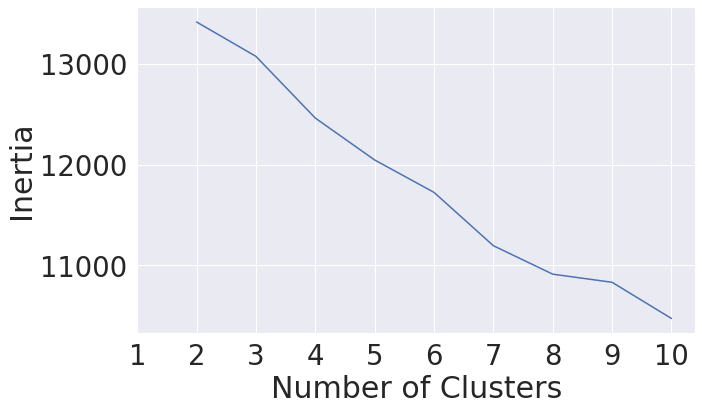

In [ ]:
# Plotting the inertia of different k-mean models
plt.rcParams.update({'figure.figsize':(10,6)})
plot = sns.lineplot(x=n_clusters, y=eval_result)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(np.arange(1, 11, step=1))

sns.set(font_scale=2.5)

plt.savefig("Kemans.jpg", bbox_inches='tight')

In [ ]:
# There is not a clear cut point where inertia improvement is the highest. To not overfit, we just choose n=7
# Running K-mean on n_cluster=7
kmeans = KMeans(n_clusters=7, random_state=0).fit(spotify_tf_idf_top)
cluster_df = spotify_tf_idf_top.copy()
cluster_df['cluster'] = list(kmeans.labels_)

In [ ]:
pd.set_option('display.max_columns', None)
cluster_stats = cluster_df.groupby('cluster').mean().round(4)
cluster_stats.to_csv("cluster_stats_7.csv")

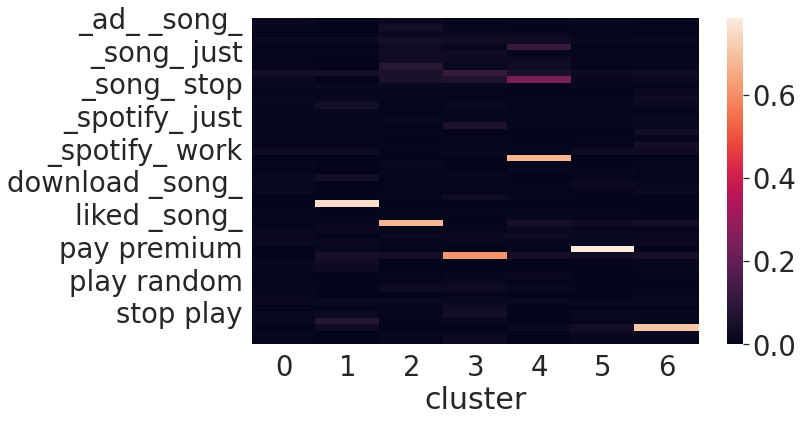

In [ ]:
sns.heatmap(cluster_df.groupby('cluster').mean().transpose())